#1. Modelo Base vs. Modelo Monty Hall
##1.1

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
def pr(r):
  return 1/3 #para todas las hipotesis devuelvo 1/3

def pc(c):
  return 1/3

def ps_rM0(s,r): #proba de s dado r del modelo M0
  return (s != r) * 1/2 #1/2 o 0 segun verdad del (...)

def ps_rcM1(s,r,c):
  if r != c:
    return (s != r) * (c != s) * 1
  else:
    return (s != r) * 1/2

In [ ]:
def prcs_M(r,c,s,m):  #proba conjunta
  if m == 0:
    return pr(r)*pc(c)*ps_rM0(s,r)
  if m == 1:
    return pr(r)*pc(c)*ps_rcM1(s,r,c)

##1.2

In [ ]:
#c y m estan fijos. tengo que recorrer todos los otros valores dejandolos fijos.
H = np.arange(3) #posibles valores de las hipotesis

def ps_cM(s,c,m): #posterior de s dado c P(s|c,M)=P(s,c|M)/P(c|M); P(s,c|M) es marginal de la conjunta
  num = 0 #P(s,c|M) = sum_r P(r,c,s|M)
  den = 0  #P(c|M)= sum_{r,s} P(r,c,s|M)
  for hr in H:
    num += prcs_M(hr,c,s,m)
    for hs in H:
      den += prcs_M(hr,c,hs,m)
  return num/den


def pr_csM(r,c,s,m): #P(r|c,s,M) = P(r,c,s|M)/P(c,s|M)
  num = prcs_M(r,c,s,m) #P(r,c,s|M)
  den = 0 #P(c,s|M) = sum_r P(r,c,s|M)
  for hr in H:
    den += prcs_M(hr,c,s,m)
  return num/den


Tenemos las predicciones. Ahora multipliquemos las tres para tener la proba de un episodio.

In [ ]:
def pEpisodio_M(c,s,r,m):
  return prcs_M(r,c,s,m)
  #return pc(c)*ps_cM(s,c,m)*pr_csM(r,c,s,m)

Probemos...

In [ ]:
pEpisodio_M(c=1,s=2,r=1,m=1)


In [ ]:
prcs_M(c=1,s=2,r=1,m=1)

##1.3

In [ ]:
def simular(T=16,seed=0):
  np.random.seed(seed)
  Datos = []
  for t in range(T):
    r = np.random.choice(3, p = [pr(hr) for hr in H])
    c = np.random.choice(3, p = [pc(hc) for hc in H])
    s = np.random.choice(3, p = [ps_rcM1(hs,r,c) for hs in H]) #ps_rcM1(s,r,c)
    Datos.append((c,s,r))
  return Datos

In [ ]:
T = 16
Datos = simular(T)
print(Datos)

##1.4

In [ ]:
def secuencia_de_predicciones(Datos,m):
  pDatos_M = [1]
  for t in range(len(Datos)):
    c,s,r = Datos[t]
    pDatos_M.append(pEpisodio_M(c,s,r,m))
  return pDatos_M

In [ ]:
pDatos_M0 = np.prod(secuencia_de_predicciones(Datos,m = 0))
pDatos_M1 = np.prod(secuencia_de_predicciones(Datos,m = 1))
print(pDatos_M0)
print(pDatos_M1)

## 1.5.1

In [ ]:
log10_pDatos_M0 = np.log10(pDatos_M0)
log10_pDatos_M1 = np.log10(pDatos_M1)

log_bayes_factor = log10_pDatos_M1 - log10_pDatos_M0

print("Diferencia predictiva: ", log_bayes_factor)
print("El modelo Monty Hall preserva", 10**log_bayes_factor, "veces más creencia")


In [ ]:
print("Log Bayes Factor: ", np.log10(pDatos_M1 / pDatos_M0))

##1.5.2

In [ ]:
log10_predicciones_M0 = np.log10(secuencia_de_predicciones(Datos, m=0))
log10_predicciones_M1 = np.log10(secuencia_de_predicciones(Datos, m=1))

N = T*3
media_geometrica_M0 = 10 ** (np.sum(log10_predicciones_M0) / N)
media_geometrica_M1 = 10 ** (np.sum(log10_predicciones_M1) / N)


print("Media geometrica base:", media_geometrica_M0)
print("Media geometrica Monty Hall:", media_geometrica_M1)


##1.6

In [ ]:
pDatos_M0

In [ ]:
pDatos_M1

In [ ]:
pDatos = pDatos_M0 * 0.5 + pDatos_M1 * 0.5
print("La probabilidad de los datos es:", pDatos)

In [84]:
pDatos_M0 * 0.5

4.117275449641637e-21

In [85]:
pDatos_M1 * 0.5

1.6864360241732144e-17

##1.7

In [86]:
def pModelo_Datos(m):
  if m == 0:
    return pDatos_M0 * 0.5 / pDatos
  if m == 1:
    return pDatos_M1 * 0.5 / pDatos

In [87]:
print("La probabilidad del M0 dados los datos es ", pModelo_Datos(0))
print("La probabilidad del M1 dados los datos es ", pModelo_Datos(1))

La probabilidad del M0 dados los datos es  0.000244081034903588
La probabilidad del M1 dados los datos es  0.9997559189650964


##1.8

In [88]:
DatosCompletos = Datos

In [89]:
x = np.linspace(0,16,num=17)
probaDatosAcum_M0 = np.zeros(17)
probaDatosAcum_M1 = np.zeros(17)

In [90]:
probaDatosAcum_M0[0] = 1
probaDatosAcum_M1[0] = 1

In [91]:
for i in range(len(Datos)):
  c,s,r = Datos[i]
  probaDatosAcum_M0[i+1] = pEpisodio_M(c,s,r,0) * probaDatosAcum_M0[i]
  probaDatosAcum_M1[i+1] = pEpisodio_M(c,s,r,1) * probaDatosAcum_M1[i]

In [92]:
print(probaDatosAcum_M0[-1] * 0.5 + probaDatosAcum_M1[-1] * 0.5)

1.6868477517181785e-17


In [93]:
probaAcumModeloM0_Datos = np.zeros(17)
probaAcumModeloM1_Datos = np.zeros(17)

In [94]:
for i in range(len(probaAcumModeloM0_Datos)):
  pDat = probaDatosAcum_M0[i] * 0.5 + probaDatosAcum_M1[i] * 0.5
  probaAcumModeloM0_Datos[i] = probaDatosAcum_M0[i] * 0.5 / pDat
  probaAcumModeloM1_Datos[i] = probaDatosAcum_M1[i] * 0.5 / pDat

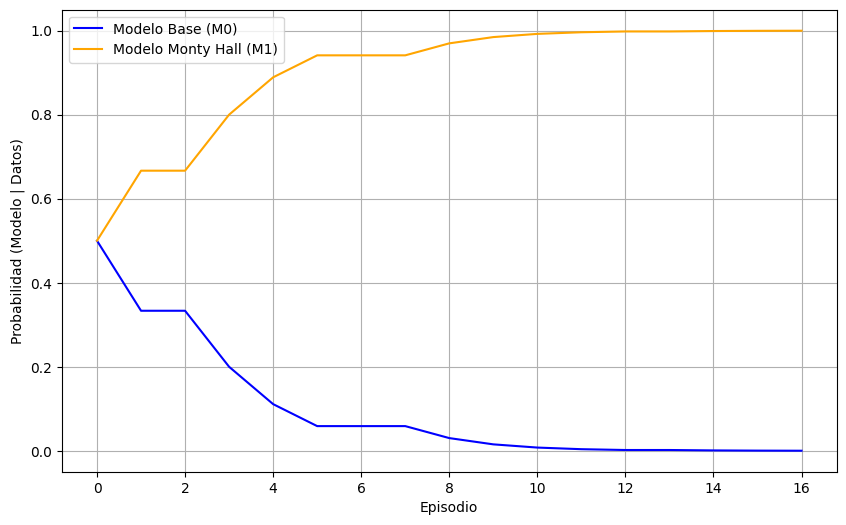

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(x, probaAcumModeloM0_Datos, color='blue', label='Modelo Base (M0)', linestyle='-')
plt.plot(x, probaAcumModeloM1_Datos, color='orange', label='Modelo Monty Hall (M1)', linestyle='-')


plt.xlabel('Episodio')
plt.ylabel('Probabilidad (Modelo | Datos)')



plt.legend()


plt.grid(True)
plt.show()

1.9

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/inferencia/NoMontyHall.csv'

with open(file_path, 'r') as file:
  noMontyHall = file.read()

In [ ]:
def pa_p(a, p):
    if a == 0:
        return 1 - p
    elif a == 1:
        return p
    else:
        return 0

# inicializo las probabilidades de p de manera uniforme
Hp = np.arange(0, 1.1, 0.1)
Ha = [0, 1]
pp_Datos = [1/11 for i in range(11)]

def prcsap_M2(r, c, s, a, ip):  # probabilidad conjunta
    return pr(r) * pc(c) * ps_rM0(s, r) ** (1 - a) * ps_rcM1(s, r, c) ** a * pa_p(a, Hp[ip]) * pp_Datos[ip]

def pEpisodio_M2(c, s, r):
    res = 0
    for a in Ha:
        for ip in range(len(Hp)):
            res += prcsap_M2(r, c, s, a, ip)
    return res

In [ ]:
# inicializo de las probabilidades y posteriores
p_M0 = p_M1 = p_M2 = 1/3
posterior_M0 = [p_M0]
posterior_M1 = [p_M1]
posterior_M2 = [p_M2]

pDatos_M0 = pDatos_M1 = pDatos_M2 = 1


lines = noMontyHall.strip().split('\n')[1:]

for i, line in enumerate(lines[:60]): # itero por indice y por line los primeros 60 datos
    c, s, r = map(int, line.split(','))

    # proba de los episodios segun cada modelo
    pDatos_M0 *= pEpisodio_M(c, s, r, m=0)
    pDatos_M1 *= pEpisodio_M(c, s, r, m=1)
    pDatos_M2 *= pEpisodio_M2(c, s, r)

    # proba datos con proba total
    pDatos = (pDatos_M0 * p_M0) + (pDatos_M1 * p_M1) + (pDatos_M2 * p_M2)

    # agrego las posteriores al vector
    posterior_M0.append(pDatos_M0 * p_M0 / pDatos)
    posterior_M1.append(pDatos_M1 * p_M1 / pDatos)
    posterior_M2.append(pDatos_M2 * p_M2 / pDatos)

    # actualizo pp_Datos con nuevos datos
    new_pp_Datos = []
    for ip, p in enumerate(Hp):
        suma_prob = 0
        for a in Ha:
            suma_prob += prcsap_M2(r, c, s, a, ip)
        new_pp_Datos.append(suma_prob)

    # normalizo las nuevas probabilidades de p (porque discreticé)
    suma_total = sum(new_pp_Datos)
    pp_Datos = [prob / suma_total for prob in new_pp_Datos]



plt.plot(range(len(posterior_M0)), posterior_M0, label='Modelo Base')
plt.plot(range(len(posterior_M1)), posterior_M1, label='Modelo Monty Hall')
plt.plot(range(len(posterior_M2)), posterior_M2, label='Modelo No Monty Hall')
plt.xlabel('Episodio')
plt.ylabel('Posterior = P(Modelo | Datos)')
plt.legend()
plt.show()

#Segundo ejercicio

#4.1

In [ ]:
import pandas as pd

In [ ]:
file_path = '/content/drive/MyDrive/inferencia/alturas.csv'

alturas = pd.read_csv(file_path)
print(alturas.head())

In [ ]:
masc = alturas[alturas['sexo'] == 'M']
fem = alturas[alturas['sexo'] == 'F']

plt.scatter(masc['altura_madre'], masc['altura'], label='Masculino', color = 'blue')
plt.scatter(fem['altura_madre'], fem['altura'], label='Femenino', color = 'orange')
plt.xlabel('Altura madre')
plt.ylabel('Altura')
plt.legend()
plt.show()

#4.2

In [ ]:
import random
import numpy as np
from numpy.random import normal as noise
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as normal
from scipy.stats import norm
import statsmodels.api as sm
import copy
#phi = polynomial_basis_function

random.seed(1)
np.random.seed(1)
cmap = plt.get_cmap("tab10")


BETA = (1/0.2)**2
ALPHA = (10e-6) # Bishop usa alpha = 5e-3

# 1/ALPHA es la varianza del prior
# 1/BETA es la varianza del ruido

def posterior(t, Phi, alpha = ALPHA, beta = BETA):
    S_N_inv = alpha * np.eye(Phi.shape[1]) + beta * Phi.T.dot(Phi)
    S_N = np.linalg.inv(S_N_inv)
    m_N = beta * S_N.dot(Phi.T).dot(t)
    return m_N, S_N

def likelihood(w, t, Phi, beta = BETA):
    res = 1
    for i in range(len(t)):
        mean = w.T.dot(Phi[i])
        sigma = np.sqrt(beta**(-1))
        res =  res * norm.pdf(t[i],mean,sigma)
    return res

def moments_predictive(Phi_posteriori, alpha = ALPHA, beta = BETA, t_priori=None, Phi_priori=None):
    N, D = Phi_posteriori.shape
    if t_priori is None: t_priori, Phi_priori = np.zeros((0,1)), np.zeros((0,D))
    m_prior, S_prior = posterior(t_priori, Phi_priori, alpha, beta)
    Phi_posteriori.dot(S_prior.dot(Phi_posteriori.T))
    sigma2 = Phi_posteriori.dot(S_prior.dot(Phi_posteriori.T)) + (1/beta)*np.eye(Phi_posteriori.shape[0])
    mu = Phi_posteriori.dot(m_prior) # m_N.T.dot(Phi)
    return mu, sigma2

def predictive(t_posteriori, Phi_posteriori, alpha = ALPHA, beta = BETA, t_priori=None, Phi_priori=None):
    m, S = moments_predictive(Phi_posteriori, alpha, beta, t_priori, Phi_priori)
    return normal.pdf(t_posteriori.ravel(),m.ravel(),S)

def log_evidence(t, Phi, alpha = ALPHA, beta = BETA):
    N, M = Phi.shape
    m_N, S_N = posterior(t, Phi, alpha, beta)
    #m_N == beta*S_N.dot(Phi.T).dot(t)
    A = np.linalg.inv(S_N)
    A_det = np.linalg.det(A)
    E_mN = (beta/2) * (t - Phi.dot(m_N)).T.dot(t - Phi.dot(m_N)) \
         + (alpha/2) * m_N.T.dot(m_N)
    res = (M/2) * np.log(alpha)   \
        + (N/2) * np.log(beta)    \
        - E_mN                    \
        - (1/2) * np.log(A_det)   \
        - (N/2) * np.log(2*np.pi)
    return res

def sinus_model(X, variance):
    '''Sinus function plus noise'''
    return np.sin(2 * np.pi * X) + noise(0,np.sqrt(variance),X.shape)

def polynomial_basis_function(x, degree=1):
    return x ** degree

In [ ]:
data = alturas

In [ ]:
# Modelo Base: altura = h0 + h1 * altura_madre
X_base = np.column_stack((np.ones(len(alturas)), alturas['altura_madre']))
y = data['altura'].values
coef_base = posterior(y, X_base) # Media del maximo a posteriori

# Modelo Biológico: altura = h0 + h1 * altura_madre + h2 * I(sexo = F)
alturas['sexo_F'] = (alturas['sexo'] == 'F').astype(int)
X_biologico = np.column_stack((np.ones(len(data)), alturas['altura_madre'], alturas['sexo_F']))
coef_biologico = posterior(y, X_biologico)

# Modelo Identitario: altura = h0 + h1 * altura_madre + h2 * (ID mod max(ID)/2)
max_ID = alturas['id'].max()
alturas['grupo_azar'] = alturas['id'] % (max_ID // 2)
num_grupos = int(max_ID // 2)
X_identitario = np.zeros((len(alturas), num_grupos))
X_identitario[:, 0] = alturas['altura_madre']
for i in range(1, num_grupos):
    X_identitario[:, i] = (alturas['grupo_azar'] == i).astype(int)

X_identitario = np.column_stack([alturas['altura_madre'], X_identitario])
coef_identitario = posterior(y, X_identitario)

In [ ]:
print("Modelo Base")
print(f"h0: {coef_base[0][0]}, h1: {coef_base[0][1]}")

print("\nModelo Biológico")
print(f"h0: {coef_biologico[0][0]}, h1: {coef_biologico[0][1]}, h2: {coef_biologico[0][2]}")

print("\nModelo Identitario")
print(f"h0 (pendiente común para altura madre): {coef_identitario[0][0]}")
for i in range(1, len(coef_identitario[0])):
    print(f"h{i+1} (Intercepto para grupo {i}): {coef_identitario[0][i]}")

#4.3

In [ ]:
log_evidencia_base = log_evidence(y, X_base)
log_evidencia_biologico = log_evidence(y, X_biologico)
log_evidencia_identitario = log_evidence(y, X_identitario)

modelos = ['Base', 'Biológico', 'Identitario']
log_evidencias = [log_evidencia_base, log_evidencia_biologico, log_evidencia_identitario]

plt.bar(modelos, log_evidencias, color=['blue', 'orange', 'green'])
plt.xlabel('Modelos Causales Alternativos')
plt.ylabel('Log-Evidencia')
plt.title('Evidencia en escala logarítmica de los modelos causales alternativos')
plt.show()

#4.4

In [ ]:
def media_geometrica(w, t, Phi, beta = BETA):
    # proba de los datos segun el modelo
    producto_verosimilitud = likelihood(w, t, Phi, beta=BETA )

    # Media geométrica
    media_geo = producto_verosimilitud**(1/N)
    return media_geo

In [109]:
media_geo_base = media_geometrica(coef_base[0], y, X_base)
media_geo_biologico = media_geometrica(coef_biologico[0], y, X_biologico)
media_geo_azar = media_geometrica(coef_identitario[0],y, X_identitario)

print("Media geométrica - Modelo Base:", media_geo_base)
print("Media geométrica - Modelo Biológico:", media_geo_biologico)
print("Media geométrica - Modelo Azar:", media_geo_azar)

Media geométrica - Modelo Base: 0.0
Media geométrica - Modelo Biológico: 0.0
Media geométrica - Modelo Azar: 0.0


##Esta de aca es la que esta bien

In [110]:
evidencia_base = np.exp(log_evidencia_base)
evidencia_biologico = np.exp(log_evidencia_biologico)
evidencia_identitario = np.exp(log_evidencia_identitario)


def media_geometrica(evidencias):
    producto_evidencias = np.prod(evidencias)
    N = len(evidencias)
    return producto_evidencias ** (1 / N)

# Evidencias de los modelos en formato de lista
evidencias_modelos = [evidencia_base, evidencia_biologico, evidencia_identitario]

# Calcular la media geométrica de las evidencias
media_geom_base = media_geometrica([evidencia_base])
media_geom_biologico = media_geometrica([evidencia_biologico])
media_geom_identitario = media_geometrica([evidencia_identitario])

print("Media geométrica de los modelos:")
print(f"Modelo Base: {media_geom_base}")
print(f"Modelo Biológico: {media_geom_biologico}")
print(f"Modelo Identitario: {media_geom_identitario}")


Media geométrica de los modelos:
Modelo Base: 0.0
Modelo Biológico: 0.0
Modelo Identitario: 0.0


Igual me dio 0 asi que me va a dividir por 0 despues

#4.5

In [111]:
print(likelihood(coef_base[0], y, X_base))
print(likelihood(coef_biologico[0], y, X_biologico))
print(likelihood(coef_identitario[0], y, X_identitario))

0.0
0.0
0.0


In [112]:
P_modelo_base = 1/3
P_modelo_biologico = 1/3
P_modelo_azar = 1/3


P_datos_base = likelihood(coef_base[0], y, X_base)
P_datos_biologico = likelihood(coef_biologico[0], y, X_biologico)
P_datos_identitario = likelihood(coef_identitario[0], y, X_identitario)


P_datos = (P_datos_base * P_modelo_base + P_datos_biologico * P_modelo_biologico + P_datos_identitario * P_modelo_azar)

posterior_base = (P_datos_base * P_modelo_base) / P_datos
posterior_biologico = (P_datos_biologico * P_modelo_biologico) / P_datos
posterior_azar = (P_datos_identitario * P_modelo_azar) / P_datos

print("Posterior - Modelo Base:", posterior_base)
print("Posterior - Modelo Biológico:", posterior_biologico)
print("Posterior - Modelo Azar:", posterior_azar)


Posterior - Modelo Base: nan
Posterior - Modelo Biológico: nan
Posterior - Modelo Azar: nan


<ipython-input-112-07abbc3f989b>:13: RuntimeWarning: invalid value encountered in scalar divide
  posterior_base = (P_datos_base * P_modelo_base) / P_datos
<ipython-input-112-07abbc3f989b>:14: RuntimeWarning: invalid value encountered in scalar divide
  posterior_biologico = (P_datos_biologico * P_modelo_biologico) / P_datos
<ipython-input-112-07abbc3f989b>:15: RuntimeWarning: invalid value encountered in scalar divide
  posterior_azar = (P_datos_identitario * P_modelo_azar) / P_datos


Posterior - Modelo Base: nan
Posterior - Modelo Biológico: nan
Posterior - Modelo Azar: nan


<ipython-input-112-07abbc3f989b>:13: RuntimeWarning: invalid value encountered in scalar divide
  posterior_base = (P_datos_base * P_modelo_base) / P_datos
<ipython-input-112-07abbc3f989b>:14: RuntimeWarning: invalid value encountered in scalar divide
  posterior_biologico = (P_datos_biologico * P_modelo_biologico) / P_datos
<ipython-input-112-07abbc3f989b>:15: RuntimeWarning: invalid value encountered in scalar divide
  posterior_azar = (P_datos_identitario * P_modelo_azar) / P_datos
